In [500]:
"""
    Feature engineering in training data and building up the model
"""

'\n    Feature engineering in training data and building up the model\n'

In [1]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Finding the csv from the league
# Multi League directory
country = 'MX'
dirCountry = '../' + country + '/'
# csv to save
file_title = 'ligaMX_5.csv'
csv_file = dirCountry + file_title
df_one = pd.read_csv(csv_file)
file_title = 'ligamx_2019.csv'
csv_file = dirCountry + file_title
df_two = pd.read_csv(csv_file)
df_one = df_one.drop(columns=["league","id"], axis=1)
df_two["season"] = np.full(df_two.shape[0], 2019)
df_two["week"] = np.full(df_two.shape[0], 28)
df_one["week"] = df_one["week"].apply(lambda x: int(''.join(filter(str.isdigit, x))))

In [3]:
# Testing against current season
current_season = 2020

In [4]:
# Retrieving previous saved data
df_laliga = df_one.append(df_two)
df_laliga = df_laliga.drop(df_laliga.columns[0], axis=1)
df_laliga = df_laliga.drop(columns=["stats_home","stats_away"], axis=1)

In [5]:
# None values set to 0
df_laliga.fillna(value=0, inplace=True)

In [6]:
# g_diff_home: an integer of the goals difference for home
df_laliga["g_diff_home"] = df_laliga["goals_home"] - df_laliga["goals_away"]
df_laliga.head()

,season,week,goals_home,goals_away,team_home.team.id,team_home.team.name,team_home.rank,team_home.points,team_home.goals_diff,team_home.form,...,stats_away.corners,stats_away.offside,stats_away.possession,stats_away.c_yellow,stats_away.c_red,stats_away.saves,stats_away.p_total,stats_away.p_accurate,stats_away.p_percentage,g_diff_home
0,2020,4,1.0,0.0,2288,Necaxa,16,4,-3,WDLL,...,1.0,2.0,63%,2.0,0.0,3.0,465.0,389.0,84%,1.0
1,2020,14,0.0,0.0,2288,Necaxa,16,4,-3,WDLL,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0
2,2020,8,0.0,0.0,2288,Necaxa,16,4,-3,WDLL,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0
3,2020,16,0.0,0.0,2288,Necaxa,16,4,-3,WDLL,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0
4,2020,3,1.0,1.0,2288,Necaxa,16,4,-3,WDLL,...,7.0,0.0,43%,2.0,0.0,2.0,264.0,197.0,75%,0.0


In [7]:
# g_diff_away: an integer of the goals difference for away
df_laliga["g_diff_away"] = df_laliga["goals_away"] - df_laliga["goals_home"]
df_laliga.head()

,season,week,goals_home,goals_away,team_home.team.id,team_home.team.name,team_home.rank,team_home.points,team_home.goals_diff,team_home.form,...,stats_away.offside,stats_away.possession,stats_away.c_yellow,stats_away.c_red,stats_away.saves,stats_away.p_total,stats_away.p_accurate,stats_away.p_percentage,g_diff_home,g_diff_away
0,2020,4,1.0,0.0,2288,Necaxa,16,4,-3,WDLL,...,2.0,63%,2.0,0.0,3.0,465.0,389.0,84%,1.0,-1.0
1,2020,14,0.0,0.0,2288,Necaxa,16,4,-3,WDLL,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
2,2020,8,0.0,0.0,2288,Necaxa,16,4,-3,WDLL,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
3,2020,16,0.0,0.0,2288,Necaxa,16,4,-3,WDLL,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
4,2020,3,1.0,1.0,2288,Necaxa,16,4,-3,WDLL,...,0.0,43%,2.0,0.0,2.0,264.0,197.0,75%,0.0,0.0


In [8]:
# Set win as 1, draw as 0 and lose as -1
def get_status(r):
    goals_home = r["goals_fhome"] + r["goals_shome"]
    goals_away = r["goals_faway"] + r["goals_saway"]
    if goals_home > goals_away:
        return 1
    elif goals_home == goals_away:
        return 0
    else:
        return -1

In [9]:
def get_status(r):
    goals_home = r["goals_home"]
    goals_away = r["goals_away"]
    if goals_home > goals_away:
        return 1
    elif goals_home == goals_away:
        return 0
    else:
        return -1

In [10]:
"""
    Form: last 5 losses
        last 5 wins
        last 5 draws
"""
# Home
df_laliga["wins_home"] = df_laliga["team_home.form"].apply(lambda x: x.count('W'))
df_laliga["loses_home"] = df_laliga["team_home.form"].apply(lambda x: x.count('L'))
df_laliga["draws_home"] = df_laliga["team_home.form"].apply(lambda x: x.count('D'))
# Away
df_laliga["wins_away"] = df_laliga["team_away.form"].apply(lambda x: x.count('W'))
df_laliga["loses_away"] = df_laliga["team_away.form"].apply(lambda x: x.count('L'))
df_laliga["draws_away"] = df_laliga["team_away.form"].apply(lambda x: x.count('D'))

df_laliga.head()

,season,week,goals_home,goals_away,team_home.team.id,team_home.team.name,team_home.rank,team_home.points,team_home.goals_diff,team_home.form,...,stats_away.p_accurate,stats_away.p_percentage,g_diff_home,g_diff_away,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
0,2020,4,1.0,0.0,2288,Necaxa,16,4,-3,WDLL,...,389.0,84%,1.0,-1.0,1,2,1,1,2,1
1,2020,14,0.0,0.0,2288,Necaxa,16,4,-3,WDLL,...,0.0,0,0.0,0.0,1,2,1,1,2,1
2,2020,8,0.0,0.0,2288,Necaxa,16,4,-3,WDLL,...,0.0,0,0.0,0.0,1,2,1,2,1,1
3,2020,16,0.0,0.0,2288,Necaxa,16,4,-3,WDLL,...,0.0,0,0.0,0.0,1,2,1,2,2,0
4,2020,3,1.0,1.0,2288,Necaxa,16,4,-3,WDLL,...,197.0,75%,0.0,0.0,1,2,1,3,0,1


In [11]:
# Promotion: either Champions, UEFA Europe, Second division
# Label encoder vs Normalize unicode encoder
description = np.unique(df_laliga["team_home.description"].astype(str))
description = np.append(description, np.unique(df_laliga["team_away.description"].astype(str)))
enc = preprocessing.LabelEncoder()
enc.fit(description)
df_laliga["team_home.description"] = enc.transform(df_laliga["team_home.description"].astype(str))
df_laliga["team_away.description"] = enc.transform(df_laliga["team_away.description"].astype(str))
df_laliga.head()

,season,week,goals_home,goals_away,team_home.team.id,team_home.team.name,team_home.rank,team_home.points,team_home.goals_diff,team_home.form,...,stats_away.p_accurate,stats_away.p_percentage,g_diff_home,g_diff_away,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
0,2020,4,1.0,0.0,2288,Necaxa,16,4,-3,WDLL,...,389.0,84%,1.0,-1.0,1,2,1,1,2,1
1,2020,14,0.0,0.0,2288,Necaxa,16,4,-3,WDLL,...,0.0,0,0.0,0.0,1,2,1,1,2,1
2,2020,8,0.0,0.0,2288,Necaxa,16,4,-3,WDLL,...,0.0,0,0.0,0.0,1,2,1,2,1,1
3,2020,16,0.0,0.0,2288,Necaxa,16,4,-3,WDLL,...,0.0,0,0.0,0.0,1,2,1,2,2,0
4,2020,3,1.0,1.0,2288,Necaxa,16,4,-3,WDLL,...,197.0,75%,0.0,0.0,1,2,1,3,0,1


In [12]:
# Group: conference west vs east
description = np.unique(df_laliga["team_home.group"].astype(str))
enc = preprocessing.LabelEncoder()
enc.fit(description)
df_laliga["team_home.group"] = enc.transform(df_laliga["team_home.group"].astype(str))
df_laliga["team_away.group"] = enc.transform(df_laliga["team_away.group"].astype(str))
df_laliga.head()

,season,week,goals_home,goals_away,team_home.team.id,team_home.team.name,team_home.rank,team_home.points,team_home.goals_diff,team_home.form,...,stats_away.p_accurate,stats_away.p_percentage,g_diff_home,g_diff_away,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
0,2020,4,1.0,0.0,2288,Necaxa,16,4,-3,WDLL,...,389.0,84%,1.0,-1.0,1,2,1,1,2,1
1,2020,14,0.0,0.0,2288,Necaxa,16,4,-3,WDLL,...,0.0,0,0.0,0.0,1,2,1,1,2,1
2,2020,8,0.0,0.0,2288,Necaxa,16,4,-3,WDLL,...,0.0,0,0.0,0.0,1,2,1,2,1,1
3,2020,16,0.0,0.0,2288,Necaxa,16,4,-3,WDLL,...,0.0,0,0.0,0.0,1,2,1,2,2,0
4,2020,3,1.0,1.0,2288,Necaxa,16,4,-3,WDLL,...,197.0,75%,0.0,0.0,1,2,1,3,0,1


In [13]:
def score_home(best):
    if best != 0:
        return int(best[0]) - int(best[2])
    return best

In [14]:
def score_away(best):
    if best != 0:
        return int(best[2]) - int(best[0])
    return best

In [15]:
# For best_lose
df_laliga["team_away.stats_home.streaks.best_lose"] = df_laliga["team_away.stats_home.streaks.best_lose"].apply(score_home)
df_laliga["team_away.stats_away.streaks.best_lose"] = df_laliga["team_away.stats_away.streaks.best_lose"].apply(score_away)
# For best_win
df_laliga["team_away.stats_home.streaks.best_win"] = df_laliga["team_away.stats_home.streaks.best_win"].apply(score_home)
df_laliga["team_away.stats_away.streaks.best_win"] = df_laliga["team_away.stats_away.streaks.best_win"].apply(score_away)
df_laliga.head()

,season,week,goals_home,goals_away,team_home.team.id,team_home.team.name,team_home.rank,team_home.points,team_home.goals_diff,team_home.form,...,stats_away.p_accurate,stats_away.p_percentage,g_diff_home,g_diff_away,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
0,2020,4,1.0,0.0,2288,Necaxa,16,4,-3,WDLL,...,389.0,84%,1.0,-1.0,1,2,1,1,2,1
1,2020,14,0.0,0.0,2288,Necaxa,16,4,-3,WDLL,...,0.0,0,0.0,0.0,1,2,1,1,2,1
2,2020,8,0.0,0.0,2288,Necaxa,16,4,-3,WDLL,...,0.0,0,0.0,0.0,1,2,1,2,1,1
3,2020,16,0.0,0.0,2288,Necaxa,16,4,-3,WDLL,...,0.0,0,0.0,0.0,1,2,1,2,2,0
4,2020,3,1.0,1.0,2288,Necaxa,16,4,-3,WDLL,...,197.0,75%,0.0,0.0,1,2,1,3,0,1


In [16]:
# For best_lose
df_laliga["team_home.stats_home.streaks.best_lose"] = df_laliga["team_home.stats_home.streaks.best_lose"].apply(score_home)
df_laliga["team_home.stats_away.streaks.best_lose"] = df_laliga["team_home.stats_away.streaks.best_lose"].apply(score_away)
# For best_win
df_laliga["team_home.stats_home.streaks.best_win"] = df_laliga["team_home.stats_home.streaks.best_win"].apply(score_home)
df_laliga["team_home.stats_away.streaks.best_win"] = df_laliga["team_home.stats_away.streaks.best_win"].apply(score_away)
df_laliga.head()

,season,week,goals_home,goals_away,team_home.team.id,team_home.team.name,team_home.rank,team_home.points,team_home.goals_diff,team_home.form,...,stats_away.p_accurate,stats_away.p_percentage,g_diff_home,g_diff_away,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
0,2020,4,1.0,0.0,2288,Necaxa,16,4,-3,WDLL,...,389.0,84%,1.0,-1.0,1,2,1,1,2,1
1,2020,14,0.0,0.0,2288,Necaxa,16,4,-3,WDLL,...,0.0,0,0.0,0.0,1,2,1,1,2,1
2,2020,8,0.0,0.0,2288,Necaxa,16,4,-3,WDLL,...,0.0,0,0.0,0.0,1,2,1,2,1,1
3,2020,16,0.0,0.0,2288,Necaxa,16,4,-3,WDLL,...,0.0,0,0.0,0.0,1,2,1,2,2,0
4,2020,3,1.0,1.0,2288,Necaxa,16,4,-3,WDLL,...,197.0,75%,0.0,0.0,1,2,1,3,0,1


In [17]:
# Posession % to decimal as p_percentage
df_laliga["stats_away.p_percentage"] = df_laliga["stats_away.p_percentage"].apply(lambda x: (int(str(x).strip('%'))/100))
df_laliga["stats_home.p_percentage"] = df_laliga["stats_home.p_percentage"].apply(lambda x: (int(str(x).strip('%'))/100))
df_laliga["stats_away.possession"] = df_laliga["stats_away.possession"].apply(lambda x: (int(str(x).strip('%'))/100))
df_laliga["stats_home.possession"] = df_laliga["stats_home.possession"].apply(lambda x: (int(str(x).strip('%'))/100))
df_laliga.head()

,season,week,goals_home,goals_away,team_home.team.id,team_home.team.name,team_home.rank,team_home.points,team_home.goals_diff,team_home.form,...,stats_away.p_accurate,stats_away.p_percentage,g_diff_home,g_diff_away,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
0,2020,4,1.0,0.0,2288,Necaxa,16,4,-3,WDLL,...,389.0,0.84,1.0,-1.0,1,2,1,1,2,1
1,2020,14,0.0,0.0,2288,Necaxa,16,4,-3,WDLL,...,0.0,0.00,0.0,0.0,1,2,1,1,2,1
2,2020,8,0.0,0.0,2288,Necaxa,16,4,-3,WDLL,...,0.0,0.00,0.0,0.0,1,2,1,2,1,1
3,2020,16,0.0,0.0,2288,Necaxa,16,4,-3,WDLL,...,0.0,0.00,0.0,0.0,1,2,1,2,2,0
4,2020,3,1.0,1.0,2288,Necaxa,16,4,-3,WDLL,...,197.0,0.75,0.0,0.0,1,2,1,3,0,1


In [18]:
"""
    Following this premise:
    - Away standings from home team aren't relevant
    - Home standings from away team aren't relevant
"""
# Drop away standings
df_premise = df_laliga.drop(df_laliga.filter(regex='team_away.stats_home.').columns, axis=1)
df_premise = df_laliga.drop(df_laliga.filter(regex='team_home.stats_away.').columns, axis=1)
print(df_premise.shape)
df_premise.head()

(410, 111)


,season,week,goals_home,goals_away,team_home.team.id,team_home.team.name,team_home.rank,team_home.points,team_home.goals_diff,team_home.form,...,stats_away.p_accurate,stats_away.p_percentage,g_diff_home,g_diff_away,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
0,2020,4,1.0,0.0,2288,Necaxa,16,4,-3,WDLL,...,389.0,0.84,1.0,-1.0,1,2,1,1,2,1
1,2020,14,0.0,0.0,2288,Necaxa,16,4,-3,WDLL,...,0.0,0.00,0.0,0.0,1,2,1,1,2,1
2,2020,8,0.0,0.0,2288,Necaxa,16,4,-3,WDLL,...,0.0,0.00,0.0,0.0,1,2,1,2,1,1
3,2020,16,0.0,0.0,2288,Necaxa,16,4,-3,WDLL,...,0.0,0.00,0.0,0.0,1,2,1,2,2,0
4,2020,3,1.0,1.0,2288,Necaxa,16,4,-3,WDLL,...,197.0,0.75,0.0,0.0,1,2,1,3,0,1


In [20]:
"""
    Here the unseen data will be built as test set - Liga Mx
"""
p37 = [[2280, 2291], [2288, 2285], [2298, 2289], [2283, 2290], [2279, 2286],
       [2287, 2282], [2281, 2278], [2314, 2295], [2292, 14002]]

In [21]:
# Getting previous record
ts_laliga = pd.DataFrame()
ts_premise = pd.DataFrame()
for match in p37:
    ts_laliga = ts_laliga.append(df_laliga[(df_laliga["team_home.team.id"]==match[0]) & (df_laliga["team_away.team.id"]==match[1])])
    ts_premise = ts_premise.append(df_premise[(df_premise["team_home.team.id"]==match[0]) & (df_premise["team_away.team.id"]==match[1])])
ts_premise.head()

,season,week,goals_home,goals_away,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.group,...,stats_away.p_accurate,stats_away.p_percentage,g_diff_home,g_diff_away,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
34,2020,6,0.0,0.0,2280,17,4,-4,0,1,...,0.0,0.00,0.0,0.0,1,2,1,2,1,1
45,2019,28,0.0,1.0,2280,16,9,-6,0,0,...,123.0,0.55,-1.0,1.0,1,3,1,3,1,1
5,2020,6,0.0,0.0,2288,16,4,-3,0,1,...,0.0,0.00,0.0,0.0,1,2,1,1,2,1
5,2019,28,3.0,0.0,2288,14,11,1,0,0,...,218.0,0.70,3.0,-3.0,1,4,0,4,1,0
142,2020,6,0.0,0.0,2298,10,5,-1,2,1,...,0.0,0.00,0.0,0.0,1,1,2,2,1,1


In [22]:
# Getting previous record
weeks = [6]
ts_laliga = pd.DataFrame()
ts_premise = pd.DataFrame()
for match in p37:
    ts_laliga = ts_laliga.append(df_laliga[(df_laliga["team_home.team.id"]==match[0]) & (df_laliga["team_away.team.id"]==match[1]) & (df_laliga["week"].isin(weeks))])
    ts_premise = ts_premise.append(df_premise[(df_premise["team_home.team.id"]==match[0]) & (df_premise["team_away.team.id"]==match[1]) & (df_premise["week"].isin(weeks))])
ts_premise.head()

,season,week,goals_home,goals_away,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.group,...,stats_away.p_accurate,stats_away.p_percentage,g_diff_home,g_diff_away,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
34,2020,6,0.0,0.0,2280,17,4,-4,0,1,...,0.0,0.0,0.0,0.0,1,2,1,2,1,1
5,2020,6,0.0,0.0,2288,16,4,-3,0,1,...,0.0,0.0,0.0,0.0,1,2,1,1,2,1
142,2020,6,0.0,0.0,2298,10,5,-1,2,1,...,0.0,0.0,0.0,0.0,1,1,2,2,1,1
111,2020,6,0.0,0.0,2283,18,1,-4,0,1,...,0.0,0.0,0.0,0.0,0,3,1,1,2,1
127,2020,6,0.0,0.0,2279,2,8,4,1,1,...,0.0,0.0,0.0,0.0,2,0,2,2,0,2


In [22]:
print(ts_laliga.shape)
print(ts_premise.shape)

(9, 128)
(9, 111)


In [19]:
# Remove categorical values as team_away and team_home names, team_home.form
df_laliga = df_laliga.drop(columns=["team_home.team.name","team_away.team.name","team_home.form","team_away.form"])
df_laliga.head()
print(df_laliga.shape)
df_premise = df_premise.drop(columns=["team_home.team.name","team_away.team.name","team_home.form","team_away.form"])

(410, 124)


In [24]:
# Auxiliar for team names
ts_name = pd.DataFrame()
ts_name["team_home.team.name"] = ts_laliga["team_home.team.name"]
ts_name["team_away.team.name"] = ts_laliga["team_away.team.name"]
ts_laliga = ts_laliga.drop(columns=["team_home.team.name","team_away.team.name","team_home.form","team_away.form"])
ts_premise = ts_premise.drop(columns=["team_home.team.name","team_away.team.name","team_home.form","team_away.form"])

In [23]:
# This is done before training, after building testing
#for match in p37:
    #df_laliga = df_laliga.drop(df_laliga[(df_laliga["team_home.team.id"]==match[0]) & (df_laliga["team_away.team.id"]==match[1])].index)
    #df_premise = df_premise.drop(df_premise[(df_premise["team_home.team.id"]==match[0]) & (df_premise["team_away.team.id"]==match[1])].index)
for match in p37:
    df_laliga = df_laliga.drop(df_laliga[(df_laliga["team_home.team.id"]==match[0]) & (df_laliga["team_away.team.id"]==match[1])].index)
    df_premise = df_premise.drop(df_premise[(df_premise["team_home.team.id"]==match[0]) & (df_premise["team_away.team.id"]==match[1])].index)
print(df_laliga.shape)
print(df_premise.shape)

(379, 124)
(379, 107)


In [24]:
# status_home: either win, draw or lose for home team, predicted label
label = []
for index, row in df_laliga.iterrows():
    label.append(get_status(row))
print(label)

[1, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, -1, -1, 0, 0, 1, 0, 1, 1, 0, 0, 1, -1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, -1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, -1, 0, 0, -1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, -1, 1, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, -1, 0, 1, 0, 0, -1, -1, 1, 1, 0, 0, 0, -1, -1, 1, 1, 0, 0, 1, 1, 1, -1, 1, 1, -1, -1, -1, -1, -1, 0, 1, -1, 0, 1, -1, -1, 0, 0, 0, 1, 0, 0, 0, 1, -1, 1, -1, 1, 1, 1, 1, 0, -1, 0, 1, 1, -1, 1, -1, 1, -1, -1, 0, 0, 0, 1, 0, 1, 1, -1, 1, 1, 1, 1, 0, 1, 1, 0, -1, -1, -1, 0, -1, 1, -1, -1, -1, 1, 0, -1, 1, 1, 0, -1, -1, 0, -1, 1, 1, 1, 1, -1, -1, 0, -1, -1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, -1, 1, 1, 1, -1, 1, -1, 1, -1, 0, 1, 1, 1, -1, 1, 1, 0, 0, 0, 0, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, -1, -1, 1, 0, -1, -1, 1, 1, 1, 0, 0, 1, -1, -1, -1,

In [25]:
# Here the clean dataset to study in tableau
df_tableau = df_laliga.copy()
df_tableau["result"] = label
# csv to save
file_title = 'clean_ligamx_p5.csv'
results_file = '../' + 'Tableau' + '/' + file_title
df_tableau.to_csv(results_file)

In [27]:
# Missing linear regression for goals_home and goals_away, as goal_diff
df_laliga = df_laliga.drop(columns=["goals_away","goals_home","g_diff_away","g_diff_home"])
print(df_laliga.shape)
df_premise = df_premise.drop(columns=["goals_away","goals_home","g_diff_away","g_diff_home"])
ts_laliga = ts_laliga.drop(columns=["goals_away","goals_home","g_diff_away","g_diff_home"])
ts_premise = ts_premise.drop(columns=["goals_away","goals_home","g_diff_away","g_diff_home"])

(379, 120)


In [28]:
# La liga
# GET avg for team_home.stats_home. team_home.stats_away. team_away.stats_home. team_away.stats_away.
columns_home = df_laliga.filter(regex='^stats_home').columns
#columns_g_home = df_laliga.filter(["goals_home","g_diff_home"]).columns
#columns_home = columns_home.append(columns_g_home)
#avg_home_laliga = df_laliga.groupby(['team_home.team.id'], as_index=True)[columns_home].mean()
avg_home_laliga = df_laliga.groupby(['team_home.team.id','season'], as_index=True)[columns_home].mean()
avg_home_laliga.head()

stats_home.s_on_g  stats_home.s_off_g  \
team_home.team.id season                                          
2278              2019             5.076923            5.153846   
                  2020             2.900000            3.700000   
2279              2019             4.357143            6.285714   
                  2020             0.571429            0.285714   
2280              2019             4.750000            6.500000   

                          stats_home.s_in  stats_home.s_out  \
team_home.team.id season                                      
2278              2019          13.615385          3.384615   
                  2020           8.800000          2.200000   
2279              2019          14.285714          3.642857   
                  2020           0.857143          0.000000   
2280              2019          14.083333          2.833333   

                          stats_home.s_total  stats_home.s_blocked  \
team_home.team.id season                                             
2278              2019              6.923077              6.692308   
                  2020              4.700000              4.100000   
2279              2019              8.071429              6.214286   
                  2020              0.714286              0.142857   
2280              2019              7.916667              6.166667   

                          stats_home.fouls  stats_home.corners  \
team_home.team.id season                                         
2278              2019           12.846154            5.230769   
                  2020            7.000000            2.700000   
2279              2019           13.000000            5.142857   
                  2020            2.000000            0.428571   
2280              2019           16.000000            4.000000   

                          stats_home.offside  stats_home.possession  \
team_home.team.id season                                              
2278              2019              0.923077               0.543846   
                  2020              0.500000               0.244000   
2279              2019              1.285714               0.612857   
                  2020              0.285714               0.071429   
2280              2019              3.000000               0.478333   

                          stats_home.c_yellow  stats_home.c_red  \
team_home.team.id season                                          
2278              2019               2.230769          0.307692   
                  2020               1.000000          0.100000   
2279              2019               1.142857          0.000000   
                  2020               0.428571          0.142857   
2280              2019               2.833333          0.500000   

                          stats_home.saves  stats_home.p_total  \
team_home.team.id season                                         
2278              2019            2.153846          422.846154   
                  2020            1.800000          197.000000   
2279              2019            2.428571          498.428571   
                  2020            0.714286           60.714286   
2280              2019            2.083333          350.416667   

                          stats_home.p_accurate  stats_home.p_percentage  
team_home.team.id season                                                  
2278              2019               353.615385                 0.829231  
                  2020               161.000000                 0.408000  
2279              2019               430.714286                 0.857143  
                  2020                52.428571                 0.122857  
2280              2019               271.750000                 0.767500

In [29]:
try:
    p = avg_home_laliga.index.values
    b = list(zip(*p))
    avg_home_laliga.insert(0, column="home_team_id",value = b[0])
    avg_home_laliga.head()
except:
    print("The indexes that are trying to be registered are already created.")

In [30]:
avg_home_laliga.head()

home_team_id  stats_home.s_on_g  stats_home.s_off_g  \
team_home.team.id season                                                        
2278              2019            2278           5.076923            5.153846   
                  2020            2278           2.900000            3.700000   
2279              2019            2279           4.357143            6.285714   
                  2020            2279           0.571429            0.285714   
2280              2019            2280           4.750000            6.500000   

                          stats_home.s_in  stats_home.s_out  \
team_home.team.id season                                      
2278              2019          13.615385          3.384615   
                  2020           8.800000          2.200000   
2279              2019          14.285714          3.642857   
                  2020           0.857143          0.000000   
2280              2019          14.083333          2.833333   

                          stats_home.s_total  stats_home.s_blocked  \
team_home.team.id season                                             
2278              2019              6.923077              6.692308   
                  2020              4.700000              4.100000   
2279              2019              8.071429              6.214286   
                  2020              0.714286              0.142857   
2280              2019              7.916667              6.166667   

                          stats_home.fouls  stats_home.corners  \
team_home.team.id season                                         
2278              2019           12.846154            5.230769   
                  2020            7.000000            2.700000   
2279              2019           13.000000            5.142857   
                  2020            2.000000            0.428571   
2280              2019           16.000000            4.000000   

                          stats_home.offside  stats_home.possession  \
team_home.team.id season                                              
2278              2019              0.923077               0.543846   
                  2020              0.500000               0.244000   
2279              2019              1.285714               0.612857   
                  2020              0.285714               0.071429   
2280              2019              3.000000               0.478333   

                          stats_home.c_yellow  stats_home.c_red  \
team_home.team.id season                                          
2278              2019               2.230769          0.307692   
                  2020               1.000000          0.100000   
2279              2019               1.142857          0.000000   
                  2020               0.428571          0.142857   
2280              2019               2.833333          0.500000   

                          stats_home.saves  stats_home.p_total  \
team_home.team.id season                                         
2278              2019            2.153846          422.846154   
                  2020            1.800000          197.000000   
2279              2019            2.428571          498.428571   
                  2020            0.714286           60.714286   
2280              2019            2.083333          350.416667   

                          stats_home.p_accurate  stats_home.p_percentage  
team_home.team.id season                                                  
2278              2019               353.615385                 0.829231  
                  2020               161.000000                 0.408000  
2279              2019               430.714286                 0.857143  
                  2020                52.428571                 0.122857  
2280              2019               271.750000                 0.767500

In [31]:
columns_away = df_laliga.filter(regex='^stats_away').columns
#columns_g_away = df_laliga.filter(["goals_away","g_diff_away"]).columns
#columns_away = columns_home.append(columns_g_away)
#avg_away_laliga = df_laliga.groupby(['team_away.team.id'], as_index=True)[columns_away].mean()
avg_away_laliga = df_laliga.groupby(['team_away.team.id','season'], as_index=True)[columns_away].mean()
avg_away_laliga.head(10)

stats_away.s_on_g  stats_away.s_off_g  \
team_away.team.id season                                          
2278              2019             3.666667            4.750000   
                  2020             1.142857            1.714286   
2279              2019             3.230769            4.769231   
                  2020             1.875000            1.625000   
2280              2019             2.833333            4.500000   
                  2020             0.625000            1.000000   
2281              2019             2.923077            4.538462   
                  2020             2.111111            1.888889   
2282              2019             4.000000            5.285714   
                  2020             0.857143            2.142857   

                          stats_away.s_in  stats_away.s_out  \
team_away.team.id season                                      
2278              2019          10.916667          2.500000   
                  2020           3.000000          0.142857   
2279              2019          10.769231          2.769231   
                  2020           5.250000          1.750000   
2280              2019           9.750000          2.416667   
                  2020           2.125000          0.500000   
2281              2019          10.000000          2.538462   
                  2020           4.666667          0.666667   
2282              2019          12.500000          3.214286   
                  2020           4.000000          1.000000   

                          stats_away.s_total  stats_away.s_blocked  \
team_away.team.id season                                             
2278              2019              5.666667              5.250000   
                  2020              2.142857              0.857143   
2279              2019              5.461538              5.307692   
                  2020              2.375000              2.875000   
2280              2019              5.083333              4.666667   
                  2020              1.250000              0.875000   
2281              2019              4.615385              5.384615   
                  2020              2.777778              1.888889   
2282              2019              8.000000              4.500000   
                  2020              2.285714              1.714286   

                          stats_away.fouls  stats_away.corners  \
team_away.team.id season                                         
2278              2019           12.083333            5.000000   
                  2020            3.714286            0.857143   
2279              2019           12.692308            4.692308   
                  2020            6.375000            1.750000   
2280              2019           13.666667            3.666667   
                  2020            4.625000            0.875000   
2281              2019           13.846154            4.846154   
                  2020            5.444444            1.444444   
2282              2019           13.000000            6.071429   
                  2020            4.000000            1.571429   

                          stats_away.offside  stats_away.possession  \
team_away.team.id season                                              
2278              2019              0.750000               0.503333   
                  2020              0.571429               0.161429   
2279              2019              1.846154               0.564615   
                  2020              0.250000               0.202500   
2280              2019              1.333333               0.440000   
                  2020              0.125000               0.115000   
2281              2019              0.923077               0.404615   
                  2020              0.222222               0.162222   
2282              2019              2.500000               0.491429   
                  2020              0.857143     

In [32]:
try:
    p = avg_away_laliga.index.values
    b = list(zip(*p))
    avg_away_laliga.insert(0, column="away_team_id",value = b[0])
    avg_away_laliga.head()
except:
    print("The indexes that are trying to be registered are already created.")

In [33]:
i_th = ts_laliga.columns.get_loc("team_home.team.id")
i_ta = ts_laliga.columns.get_loc("team_away.team.id")
for i in range(len(ts_laliga)):
    for index, row in avg_home_laliga.iterrows():
        # getting just current season
        if ts_laliga.iloc[i,i_th] == index[0] and index[1] == current_season:
            for c in columns_home:
                try:
                    i_c = ts_laliga.columns.get_loc(c)
                    ts_laliga.iloc[i,i_c] = row[c]
                except:
                    print(index, c)
for i in range(0, len(ts_laliga)):
    for index, row in avg_away_laliga.iterrows():
        if ts_laliga.iloc[i,i_ta] == index[0] and index[1] == current_season:
            for c in columns_away:
                try:
                    i_c = ts_laliga.columns.get_loc(c)
                    ts_laliga.iloc[i,i_c] = row[c]
                except:
                    print(index, c)
ts_laliga.head(10)

,season,week,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.group,team_home.stats_home.played,team_home.stats_home.wins,...,stats_away.saves,stats_away.p_total,stats_away.p_accurate,stats_away.p_percentage,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
34,2020,6,2280,17,4,-4,0,1,3,1,...,0.500000,109.750000,91.125000,0.207500,1,2,1,2,1,1
5,2020,6,2288,16,4,-3,0,1,3,1,...,1.750000,106.750000,77.875000,0.271250,1,2,1,1,2,1
142,2020,6,2298,10,5,-1,2,1,2,1,...,1.125000,201.250000,171.625000,0.318750,1,1,2,2,1,1
111,2020,6,2283,18,1,-4,0,1,2,0,...,0.875000,73.250000,55.000000,0.187500,0,3,1,1,2,1
127,2020,6,2279,2,8,4,1,1,2,1,...,1.166667,92.666667,72.666667,0.260000,2,0,2,2,0,2
39,2020,6,2287,1,10,7,1,1,2,2,...,1.000000,90.000000,70.000000,0.220000,3,0,1,1,1,2
24,2020,6,2281,7,6,-1,2,1,1,1,...,1.000000,118.000000,95.571429,0.231429,2,2,0,1,2,1
55,2020,6,2314,8,5,1,2,1,2,0,...,0.125000,124.875000,106.000000,0.211250,1,1,2,2,1,1
66,2020,6,2292,12,4,-1,2,1,3,1,...,1.142857,135.571429,115.428571,0.244286,1,2,1,1,2,1


In [34]:
# Premise
# GET avg for team_home.stats_home. team_away.stats_away.
i_th = ts_premise.columns.get_loc("team_home.team.id")
i_ta = ts_premise.columns.get_loc("team_away.team.id")
for i in range(len(ts_premise)):
    for index, row in avg_home_laliga.iterrows():
        if ts_premise.iloc[i,i_th] == index[0] and index[1] == current_season:
            for c in columns_home:
                try:
                    i_c = ts_premise.columns.get_loc(c)
                    ts_premise.iloc[i,i_c] = row[c]
                except:
                    print(index, c)
for i in range(0, len(ts_premise)):
    for index, row in avg_away_laliga.iterrows():
        if ts_premise.iloc[i,i_ta] == index[0] and index[1] == current_season:
            for c in columns_away:
                try:
                    i_c = ts_premise.columns.get_loc(c)
                    ts_premise.iloc[i,i_c] = row[c]
                except:
                    print(index, c)
ts_premise.head(10)

,season,week,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.group,team_home.stats_home.played,team_home.stats_home.wins,...,stats_away.saves,stats_away.p_total,stats_away.p_accurate,stats_away.p_percentage,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
34,2020,6,2280,17,4,-4,0,1,3,1,...,0.500000,109.750000,91.125000,0.207500,1,2,1,2,1,1
5,2020,6,2288,16,4,-3,0,1,3,1,...,1.750000,106.750000,77.875000,0.271250,1,2,1,1,2,1
142,2020,6,2298,10,5,-1,2,1,2,1,...,1.125000,201.250000,171.625000,0.318750,1,1,2,2,1,1
111,2020,6,2283,18,1,-4,0,1,2,0,...,0.875000,73.250000,55.000000,0.187500,0,3,1,1,2,1
127,2020,6,2279,2,8,4,1,1,2,1,...,1.166667,92.666667,72.666667,0.260000,2,0,2,2,0,2
39,2020,6,2287,1,10,7,1,1,2,2,...,1.000000,90.000000,70.000000,0.220000,3,0,1,1,1,2
24,2020,6,2281,7,6,-1,2,1,1,1,...,1.000000,118.000000,95.571429,0.231429,2,2,0,1,2,1
55,2020,6,2314,8,5,1,2,1,2,0,...,0.125000,124.875000,106.000000,0.211250,1,1,2,2,1,1
66,2020,6,2292,12,4,-1,2,1,3,1,...,1.142857,135.571429,115.428571,0.244286,1,2,1,1,2,1


In [35]:
# Drop ids
df_laliga = df_laliga.drop(columns=["team_home.group","team_away.group", 
                                    "team_away.stats_away.played", "team_away.stats_home.played",
                                    "team_home.stats_away.played", "team_home.stats_home.played"])
print(df_laliga.shape)
df_premise = df_premise.drop(columns=["team_home.group","team_away.group",
                                      "team_away.stats_away.played","team_home.stats_home.played"])

(379, 114)


In [36]:
ts_laliga = ts_laliga.drop(columns=["team_home.group","team_away.group",
                                    "team_away.stats_away.played", "team_away.stats_home.played",
                                    "team_home.stats_away.played", "team_home.stats_home.played"])
ts_premise = ts_premise.drop(columns=["team_home.group","team_away.group",
                                      "team_away.stats_away.played", "team_home.stats_home.played"])

In [37]:
"""
    Three algorithms:
        - SVM
        - PCA
        - Naive Bayes
    To train, both: premise and regular data
"""

'\n    Three algorithms:\n        - SVM\n        - PCA\n        - Naive Bayes\n    To train, both: premise and regular data\n'

In [38]:
results_laliga = ts_laliga.copy()
results_premise = ts_premise.copy()

In [39]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, normalize

In [40]:
# For PCA teams' ids will be removed
pca_laliga = df_laliga.drop(columns=["team_home.team.id","team_away.team.id"], axis=1)
pca_premise = df_premise.drop(columns=["team_home.team.id","team_away.team.id"], axis=1)
pca_test_laliga = ts_laliga.drop(columns=["team_home.team.id","team_away.team.id"], axis=1)
pca_test_premise = ts_premise.drop(columns=["team_home.team.id","team_away.team.id"], axis=1)

In [41]:
# Standardizing the features
pca_laliga = StandardScaler().fit_transform(pca_laliga)
#pca_laliga = normalize(pca_laliga) 
pca_premise = StandardScaler().fit_transform(pca_premise)
#pca_premise = normalize(pca_premise) 
pca_test_laliga = StandardScaler().fit_transform(pca_test_laliga)
#pca_test_laliga = normalize(pca_test_laliga) 
pca_test_premise = StandardScaler().fit_transform(pca_test_premise)
#pca_test_premise= normalize(pca_test_premise) 
# Performs pca to reduce to 10 components
pca_fi = PCA(n_components=9)
pca_laliga_fi = pca_fi.fit_transform(pca_laliga)
pca_premise_fi = pca_fi.fit_transform(pca_premise)
pca_test_laliga_fi = pca_fi.fit_transform(pca_test_laliga)
pca_test_premise_fi = pca_fi.fit_transform(pca_test_premise)
# Performs pca to reduce to 5 components
pca_tw = PCA(n_components=5)
pca_laliga_tw = pca_tw.fit_transform(pca_laliga)
pca_premise_tw = pca_tw.fit_transform(pca_premise)
pca_test_laliga_tw = pca_tw.fit_transform(pca_test_laliga)
pca_test_premise_tw = pca_tw.fit_transform(pca_test_premise)

In [42]:
# Understanding PCA
ex_variance=np.var(pca_premise_fi,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print(ex_variance_ratio)

[0.56848919 0.10207889 0.08667518 0.07797331 0.04304675 0.03972677
 0.03542297 0.02402339 0.02256356]


In [43]:
# Select two components
ex_variance=np.var(pca_premise_tw,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print(ex_variance_ratio)

[0.64728787 0.11622812 0.09868928 0.08878124 0.04901349]


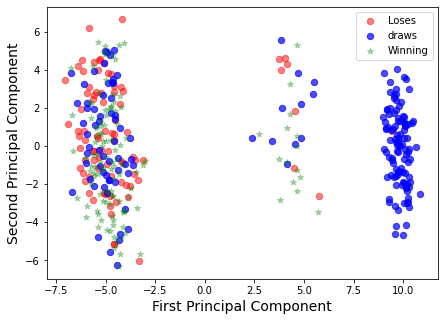

In [46]:
Xax=pca_premise_tw[:,0]
Yax=pca_premise_tw[:,1]
#labels=cancer.target
cdict={-1:'red',1:'green', 0:'blue'}
labl={1:'Winning',-1:'Loses', 0:'draws'}
marker={1:'*',-1:'o', 0:'o'}
alpha={1:.3, -1:.5, 0:.7}
fig,ax=plt.subplots(figsize=(7,5))
fig.patch.set_facecolor('white')
for l in np.unique(label):
    ix = np.where(label==l)
    ax.scatter(Xax[ix],Yax[ix],c=cdict[l],s=40,label=labl[l],marker=marker[l],alpha=alpha[l])
# for loop ends
plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.legend()
plt.show()
# please check the scatter plot of the remaining component and you will understand the difference

/anaconda3/envs/thesis/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  


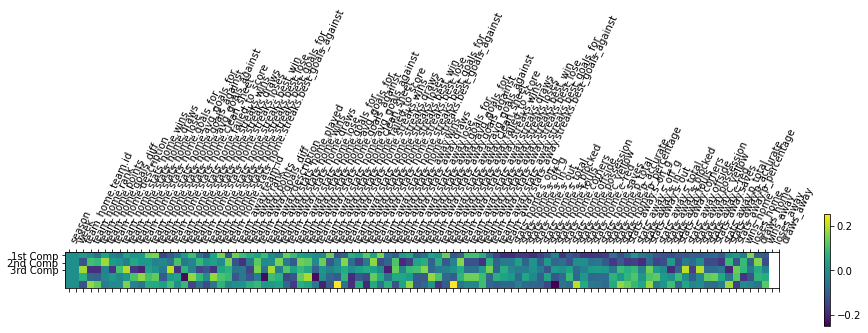

In [47]:
feature_names = df_premise.columns
plt.matshow(pca_tw.components_,cmap='viridis')
plt.yticks([0,1,2],['1st Comp','2nd Comp','3rd Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(feature_names)),feature_names,rotation=65,ha='left')
plt.tight_layout()
plt.show()# 

In [44]:
# SVM algorithm, using premise
from sklearn.svm import SVC
sv_p = SVC(gamma='auto', probability=True)
sv_p.fit(pca_premise, label)
results_premise["svm"] = sv_p.predict(pca_test_premise)
results_premise.head()

,season,week,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.stats_home.wins,team_home.stats_home.draws,team_home.stats_home.lose,...,stats_away.p_total,stats_away.p_accurate,stats_away.p_percentage,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away,svm
34,2020,6,2280,17,4,-4,0,1,1,1,...,109.750000,91.125000,0.20750,1,2,1,2,1,1,-1
5,2020,6,2288,16,4,-3,0,1,1,1,...,106.750000,77.875000,0.27125,1,2,1,1,2,1,1
142,2020,6,2298,10,5,-1,2,1,0,1,...,201.250000,171.625000,0.31875,1,1,2,2,1,1,1
111,2020,6,2283,18,1,-4,0,0,0,2,...,73.250000,55.000000,0.18750,0,3,1,1,2,1,-1
127,2020,6,2279,2,8,4,1,1,1,0,...,92.666667,72.666667,0.26000,2,0,2,2,0,2,0


In [45]:
print(results_premise["svm"])

34    -1
5      1
142    1
111   -1
127    0
39     1
24     1
55     1
66     1
Name: svm, dtype: int64


In [46]:
# SVM, Not using premise
sv = SVC(gamma='auto')
sv.fit(pca_laliga, label)
results_laliga["svm"] = sv.predict(pca_test_laliga)
results_laliga.head()

,season,week,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.stats_home.wins,team_home.stats_home.draws,team_home.stats_home.lose,...,stats_away.p_total,stats_away.p_accurate,stats_away.p_percentage,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away,svm
34,2020,6,2280,17,4,-4,0,1,1,1,...,109.750000,91.125000,0.20750,1,2,1,2,1,1,-1
5,2020,6,2288,16,4,-3,0,1,1,1,...,106.750000,77.875000,0.27125,1,2,1,1,2,1,-1
142,2020,6,2298,10,5,-1,2,1,0,1,...,201.250000,171.625000,0.31875,1,1,2,2,1,1,1
111,2020,6,2283,18,1,-4,0,0,0,2,...,73.250000,55.000000,0.18750,0,3,1,1,2,1,-1
127,2020,6,2279,2,8,4,1,1,1,0,...,92.666667,72.666667,0.26000,2,0,2,2,0,2,0


In [47]:
print(results_laliga["svm"])

34    -1
5     -1
142    1
111   -1
127    0
39     1
24     1
55     0
66     1
Name: svm, dtype: int64


In [48]:
# SVM using premise with PCA
sv_p_fi = SVC(gamma='auto')
sv_p_fi.fit(pca_premise_fi, label)
results_premise["svm_pca_fi"] = sv_p_fi.predict(pca_test_premise_fi)
print(results_premise["svm_pca_fi"])
sv_p_tw = SVC(gamma='auto')
sv_p_tw.fit(pca_premise_tw, label)
results_premise["svm_pca_tw"] = sv_p_tw.predict(pca_test_premise_tw)
print(results_premise["svm_pca_tw"])

34     1
5      1
142    1
111    1
127    1
39     1
24     1
55     1
66     1
Name: svm_pca_fi, dtype: int64
34     1
5      1
142    1
111    1
127    0
39     1
24     1
55     1
66     1
Name: svm_pca_tw, dtype: int64


In [49]:
# SVM, Not using premise with PCA
sv_fi = SVC(gamma='auto')
sv_fi.fit(pca_laliga_fi, label)
results_laliga["svm_pca_fi"] = sv_fi.predict(pca_test_laliga_fi)
print(results_laliga["svm_pca_fi"])
sv_tw = SVC(gamma='auto')
sv_tw.fit(pca_laliga_tw, label)
results_laliga["svm_pca_tw"] = sv_tw.predict(pca_test_laliga_tw)
print(results_laliga["svm_pca_tw"])

34     1
5      1
142    1
111    1
127    0
39     1
24     1
55     1
66     1
Name: svm_pca_fi, dtype: int64
34     1
5      0
142    1
111    1
127    0
39     1
24     1
55     1
66     1
Name: svm_pca_tw, dtype: int64


In [50]:
df_premise.head()

,season,week,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.stats_home.wins,team_home.stats_home.draws,team_home.stats_home.lose,...,stats_away.saves,stats_away.p_total,stats_away.p_accurate,stats_away.p_percentage,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
0,2020,4,2288,16,4,-3,0,1,1,1,...,3.0,465.0,389.0,0.84,1,2,1,1,2,1
1,2020,14,2288,16,4,-3,0,1,1,1,...,0.0,0.0,0.0,0.00,1,2,1,1,2,1
2,2020,8,2288,16,4,-3,0,1,1,1,...,0.0,0.0,0.0,0.00,1,2,1,2,1,1
3,2020,16,2288,16,4,-3,0,1,1,1,...,0.0,0.0,0.0,0.00,1,2,1,2,2,0
4,2020,3,2288,16,4,-3,0,1,1,1,...,2.0,264.0,197.0,0.75,1,2,1,3,0,1


In [51]:
# Naive Bayes, using premise
from sklearn.naive_bayes import GaussianNB
gnb_p = GaussianNB()
gnb_p.fit(df_premise, label)
results_premise["nb"] = gnb_p.predict(ts_premise)

In [52]:
# Regular NB
gnb = GaussianNB()
gnb_p.fit(df_laliga, label)
results_laliga["nb"] = gnb_p.predict(ts_laliga)
results_laliga.head()

,season,week,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.stats_home.wins,team_home.stats_home.draws,team_home.stats_home.lose,...,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away,svm,svm_pca_fi,svm_pca_tw,nb
34,2020,6,2280,17,4,-4,0,1,1,1,...,1,2,1,2,1,1,-1,1,1,0
5,2020,6,2288,16,4,-3,0,1,1,1,...,1,2,1,1,2,1,-1,1,0,0
142,2020,6,2298,10,5,-1,2,1,0,1,...,1,1,2,2,1,1,1,1,1,0
111,2020,6,2283,18,1,-4,0,0,0,2,...,0,3,1,1,2,1,-1,1,1,0
127,2020,6,2279,2,8,4,1,1,1,0,...,2,0,2,2,0,2,0,0,0,0


In [57]:
# Add ids # NO EN PCA
pca_laliga_fi['team_home.team.id'] = df_laliga['team_home.team.id'].values
pca_laliga_fi['team_away.team.id'] = df_laliga['team_away.team.id'].values
pca_premise_fi['team_home.team.id'] = df_laliga['team_home.team.id'].values
pca_premise_fi['team_away.team.id'] = df_laliga['team_away.team.id'].values
pca_test_laliga_fi['team_home.team.id'] = ts_laliga['team_home.team.id'].values
pca_test_laliga_fi['team_away.team.id'] = ts_laliga['team_away.team.id'].values
pca_test_premise_fi['team_home.team.id'] = ts_laliga['team_home.team.id'].values
pca_test_premise_fi['team_away.team.id'] = ts_laliga['team_away.team.id'].values

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [58]:
# NB using premise with PCA
gnb_p_fi = GaussianNB()
gnb_p_fi.fit(pca_premise_fi, label)
results_premise["nb_pca_fi"] = gnb_p_fi.predict(pca_test_premise_fi)
gnb_p_tw = GaussianNB()
gnb_p_tw.fit(pca_premise_tw, label)
results_premise["nb_pca_tw"] = gnb_p_tw.predict(pca_test_premise_tw)
results_premise.head(10)

,season,week,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.stats_home.wins,team_home.stats_home.draws,team_home.stats_home.lose,...,draws_home,wins_away,loses_away,draws_away,svm,svm_pca_fi,svm_pca_tw,nb,nb_pca_fi,nb_pca_tw
148,2020,5,2291,2,7,4,1,0,1,0,...,1,1,1,1,0,1,1,0,-1,-1
86,2020,5,2278,17,1,-3,0,0,1,1,...,1,0,1,2,1,1,1,0,1,1
75,2020,5,2295,3,7,4,1,2,0,0,...,1,1,0,2,1,1,1,0,1,-1
96,2020,5,2282,7,4,1,2,1,1,0,...,1,0,2,1,1,1,1,0,-1,1
80,2020,5,14002,11,4,-2,2,1,0,1,...,1,2,0,1,0,0,0,0,0,0
22,2020,5,2281,13,3,-2,0,1,0,0,...,0,1,0,2,-1,1,1,0,1,1
110,2020,5,2285,8,4,0,2,1,0,0,...,1,0,2,1,1,1,1,0,1,1
130,2020,5,2290,15,1,-2,0,0,1,0,...,1,2,0,1,-1,1,1,0,1,1
49,2020,5,2289,10,4,-1,2,1,0,0,...,1,1,1,1,1,1,1,0,1,0


In [59]:
# NB, Not using premise with PCA
gnb_fi = GaussianNB()
gnb_fi.fit(pca_laliga_fi, label)
results_laliga["nb_pca_fi"] = gnb_fi.predict(pca_test_laliga_fi)
gnb_tw = GaussianNB()
gnb_tw.fit(pca_laliga_tw, label)
results_laliga["nb_pca_tw"] = gnb_tw.predict(pca_test_laliga_tw)
results_laliga.head()

,season,week,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.stats_home.wins,team_home.stats_home.draws,team_home.stats_home.lose,...,draws_home,wins_away,loses_away,draws_away,svm,svm_pca_fi,svm_pca_tw,nb,nb_pca_fi,nb_pca_tw
148,2020,5,2291,2,7,4,1,0,1,0,...,1,1,1,1,0,1,1,0,-1,-1
86,2020,5,2278,17,1,-3,0,0,1,1,...,1,0,1,2,1,1,1,0,1,1
75,2020,5,2295,3,7,4,1,2,0,0,...,1,1,0,2,1,1,1,0,1,1
96,2020,5,2282,7,4,1,2,1,1,0,...,1,0,2,1,1,1,1,0,1,1
80,2020,5,14002,11,4,-2,2,1,0,1,...,1,2,0,1,0,1,1,0,1,-1


In [60]:
"""
    Feature Selection:
    Test against ANOVA f-score
"""

'\n    Feature Selection:\n    Test against ANOVA f-score\n'

In [61]:
from sklearn.feature_selection import SelectKBest, f_classif

In [62]:
# Using ANOVA f-score
best_features_premise = SelectKBest(f_classif, k=20).fit(df_premise, label)
best_features = SelectKBest(f_classif, k=20).fit(df_laliga, label)
df_chi = best_features.transform(df_laliga)
premise_chi = best_features_premise.transform(df_premise)
ts_chi = best_features.transform(ts_laliga)
ts_premise_chi = best_features_premise.transform(ts_premise)

In [63]:
# Using Gaussian Naive Bayes and chi-squared
gnb_p_chi = GaussianNB()
gnb_p_chi.fit(premise_chi, label)
results_premise["nb_fval"] = gnb_p_chi.predict(ts_premise_chi)
gnb_chi = GaussianNB()
gnb_chi.fit(df_chi, label)
results_laliga["nb_fval"] = gnb_chi.predict(ts_chi)
results_premise.head(10)

,season,week,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.stats_home.wins,team_home.stats_home.draws,team_home.stats_home.lose,...,wins_away,loses_away,draws_away,svm,svm_pca_fi,svm_pca_tw,nb,nb_pca_fi,nb_pca_tw,nb_fval
148,2020,5,2291,2,7,4,1,0,1,0,...,1,1,1,0,1,1,0,-1,-1,0
86,2020,5,2278,17,1,-3,0,0,1,1,...,0,1,2,1,1,1,0,1,1,0
75,2020,5,2295,3,7,4,1,2,0,0,...,1,0,2,1,1,1,0,1,-1,0
96,2020,5,2282,7,4,1,2,1,1,0,...,0,2,1,1,1,1,0,-1,1,0
80,2020,5,14002,11,4,-2,2,1,0,1,...,2,0,1,0,0,0,0,0,0,0
22,2020,5,2281,13,3,-2,0,1,0,0,...,1,0,2,-1,1,1,0,1,1,0
110,2020,5,2285,8,4,0,2,1,0,0,...,0,2,1,1,1,1,0,1,1,0
130,2020,5,2290,15,1,-2,0,0,1,0,...,2,0,1,-1,1,1,0,1,1,0
49,2020,5,2289,10,4,-1,2,1,0,0,...,1,1,1,1,1,1,0,1,0,0


In [64]:
# Using Random Forests for Training with all Features
from sklearn.ensemble import RandomForestClassifier
# At least two matches en each classification per week
premise_clf = RandomForestClassifier(criterion="entropy", max_features="log2", min_samples_leaf=2).fit(df_premise, label)
results_premise["rf"] = premise_clf.predict(ts_premise)
laliga_clf = RandomForestClassifier(criterion="entropy", max_features="log2", min_samples_leaf=2).fit(df_laliga, label)
results_laliga["rf"] = laliga_clf.predict(ts_laliga)

In [65]:
df_premise.head()

,season,week,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.stats_home.wins,team_home.stats_home.draws,team_home.stats_home.lose,...,stats_away.saves,stats_away.p_total,stats_away.p_accurate,stats_away.p_percentage,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
0,2020,4,2288,18,1,-4,0,0,1,1,...,3.0,465.0,389.0,0.84,0,2,1,1,1,1
1,2020,14,2288,18,1,-4,0,0,1,1,...,0.0,0.0,0.0,0.00,0,2,1,1,1,1
2,2020,8,2288,18,1,-4,0,0,1,1,...,0.0,0.0,0.0,0.00,0,2,1,1,1,1
3,2020,16,2288,18,1,-4,0,0,1,1,...,0.0,0.0,0.0,0.00,0,2,1,1,2,0
4,2020,3,2288,18,1,-4,0,0,1,1,...,2.0,264.0,197.0,0.75,0,2,1,2,0,1


In [66]:
importances = premise_clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in premise_clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

columns_name = df_laliga.columns

for f in range(df_laliga.shape[1]):
    print("%d. feature %s %d (%f)" % (f + 1, columns_name[indices[f]], indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(df_laliga.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(df_laliga.shape[1]), indices)
plt.xlim([-1, df_laliga.shape[1]])
plt.show()

Feature ranking:
1. feature team_away.stats_away.streaks.best_goals_against 75 (0.041303)
2. feature team_away.stats_away.streaks.best_goals_for 74 (0.038133)
3. feature stats_away.s_on_g 92 (0.034115)
4. feature stats_home.c_yellow 86 (0.033935)
5. feature team_away.stats_away.lose 62 (0.032010)
6. feature team_away.stats_away.draws 61 (0.030469)
7. feature stats_home.s_on_g 76 (0.027090)
8. feature team_away.stats_away.clean_sheet 67 (0.025614)
9. feature team_away.stats_away.avg_goals_against 66 (0.024920)
10. feature team_away.stats_away.goals_against 65 (0.024025)
11. feature stats_home.p_percentage 91 (0.023604)
12. feature team_away.stats_away.failed_to_score 68 (0.023436)
13. feature stats_home.s_off_g 77 (0.022898)
14. feature team_away.stats_away.streaks.draws 70 (0.022065)
15. feature stats_home.p_accurate 90 (0.022045)
16. feature team_away.stats_away.goals_for 63 (0.020386)
17. feature stats_home.offside 84 (0.018803)
18. feature stats_home.s_blocked 81 (0.016301)
19. feat

IndexError: index 99 is out of bounds for axis 0 with size 99

In [67]:
print(premise_clf.predict_proba(ts_premise)[5])
print(premise_clf.predict_proba(ts_premise)[8])

[0.16116667 0.6815     0.15733333]
[0.09142857 0.7802381  0.12833333]


In [68]:
ts_premise.head(10)

,season,week,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.stats_home.wins,team_home.stats_home.draws,team_home.stats_home.lose,...,stats_away.saves,stats_away.p_total,stats_away.p_accurate,stats_away.p_percentage,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
148,2020,5,2291,2,7,4,1,0,1,0,...,0.285714,40.142857,31.857143,0.112857,2,0,1,1,1,1
86,2020,5,2278,17,1,-3,0,0,1,1,...,1.285714,84.000000,66.571429,0.220000,0,2,1,0,1,2
75,2020,5,2295,3,7,4,1,2,0,0,...,0.666667,90.833333,67.000000,0.240000,2,0,1,1,0,2
96,2020,5,2282,7,4,1,2,1,1,0,...,0.666667,60.500000,48.500000,0.133333,1,1,1,0,2,1
80,2020,5,14002,11,4,-2,2,1,0,1,...,0.714286,32.142857,24.000000,0.107143,1,1,1,2,0,1
22,2020,5,2281,13,3,-2,0,1,0,0,...,0.285714,129.714286,109.428571,0.240000,1,2,0,1,0,2
110,2020,5,2285,8,4,0,2,1,0,0,...,0.750000,91.500000,72.500000,0.198750,1,1,1,0,2,1
130,2020,5,2290,15,1,-2,0,0,1,0,...,0.571429,87.571429,69.285714,0.225714,0,2,1,2,0,1
49,2020,5,2289,10,4,-1,2,1,0,0,...,0.714286,48.857143,40.857143,0.120000,1,1,1,1,1,1


In [69]:
ts_premise.head()

,season,week,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.stats_home.wins,team_home.stats_home.draws,team_home.stats_home.lose,...,stats_away.saves,stats_away.p_total,stats_away.p_accurate,stats_away.p_percentage,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
148,2020,5,2291,2,7,4,1,0,1,0,...,0.285714,40.142857,31.857143,0.112857,2,0,1,1,1,1
86,2020,5,2278,17,1,-3,0,0,1,1,...,1.285714,84.000000,66.571429,0.220000,0,2,1,0,1,2
75,2020,5,2295,3,7,4,1,2,0,0,...,0.666667,90.833333,67.000000,0.240000,2,0,1,1,0,2
96,2020,5,2282,7,4,1,2,1,1,0,...,0.666667,60.500000,48.500000,0.133333,1,1,1,0,2,1
80,2020,5,14002,11,4,-2,2,1,0,1,...,0.714286,32.142857,24.000000,0.107143,1,1,1,2,0,1


In [70]:
def prob(x, result):
    count = 0
    result = float(result)
    if x["nb"] == result:
        count = count + 1
    if x["nb_pca_fi"] == result:
        count = count + 1
    if x["nb_pca_tw"] == result:
        count = count + 1
    if x["nb_fval"] == result:
        count = count + 1
    if x["rf"] == result:
        count = count + 1
    return count/5

In [71]:
# Probability
win_result = '1'
lose_result = '-1'
draw_result = '0'
results_laliga["w_p"] = results_laliga.apply(prob, args=(win_result), axis=1)
results_laliga["d_p"] = results_laliga.apply(prob, args=(draw_result), axis=1)
results_laliga["l_p"] = 1 - (results_laliga["w_p"] + results_laliga["d_p"])
results_laliga.head()

,season,week,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.stats_home.wins,team_home.stats_home.draws,team_home.stats_home.lose,...,svm_pca_fi,svm_pca_tw,nb,nb_pca_fi,nb_pca_tw,nb_fval,rf,w_p,d_p,l_p
148,2020,5,2291,2,7,4,1,0,1,0,...,1,1,0,-1,-1,0,0,0.0,0.6,0.4
86,2020,5,2278,17,1,-3,0,0,1,1,...,1,1,0,1,1,0,0,0.4,0.6,0.0
75,2020,5,2295,3,7,4,1,2,0,0,...,1,1,0,1,1,0,0,0.4,0.6,0.0
96,2020,5,2282,7,4,1,2,1,1,0,...,1,1,0,1,1,0,0,0.4,0.6,0.0
80,2020,5,14002,11,4,-2,2,1,0,1,...,1,1,0,1,-1,0,0,0.2,0.6,0.2


In [72]:
results_premise["w_p"] = results_premise.apply(prob, args=(win_result), axis=1)
results_premise["d_p"] = results_premise.apply(prob, args=(draw_result), axis=1)
results_premise["l_p"] = 1 - (results_premise["w_p"] + results_premise["d_p"])
results_premise.head(10)

,season,week,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.stats_home.wins,team_home.stats_home.draws,team_home.stats_home.lose,...,svm_pca_fi,svm_pca_tw,nb,nb_pca_fi,nb_pca_tw,nb_fval,rf,w_p,d_p,l_p
148,2020,5,2291,2,7,4,1,0,1,0,...,1,1,0,-1,-1,0,0,0.0,0.6,0.4
86,2020,5,2278,17,1,-3,0,0,1,1,...,1,1,0,1,1,0,0,0.4,0.6,0.0
75,2020,5,2295,3,7,4,1,2,0,0,...,1,1,0,1,-1,0,0,0.2,0.6,0.2
96,2020,5,2282,7,4,1,2,1,1,0,...,1,1,0,-1,1,0,0,0.2,0.6,0.2
80,2020,5,14002,11,4,-2,2,1,0,1,...,0,0,0,0,0,0,0,0.0,1.0,0.0
22,2020,5,2281,13,3,-2,0,1,0,0,...,1,1,0,1,1,0,0,0.4,0.6,0.0
110,2020,5,2285,8,4,0,2,1,0,0,...,1,1,0,1,1,0,0,0.4,0.6,0.0
130,2020,5,2290,15,1,-2,0,0,1,0,...,1,1,0,1,1,0,0,0.4,0.6,0.0
49,2020,5,2289,10,4,-1,2,1,0,0,...,1,1,0,1,0,0,0,0.2,0.8,0.0


In [73]:
# Adding name columns
results_laliga["team_home.team.name"] = ts_name["team_home.team.name"]
results_laliga["team_away.team.name"] = ts_name["team_away.team.name"]
results_premise["team_home.team.name"] = ts_name["team_home.team.name"]
results_premise["team_away.team.name"] = ts_name["team_away.team.name"]

In [74]:
# csv to save
file_title = 'ligamx_p5.csv'
results_file = dirCountry + file_title
file_title = 'premise_p5.csv'
results_premise_file = dirCountry + file_title

In [75]:
results_laliga.to_csv(results_file)
results_premise.to_csv(results_premise_file)

In [203]:
# Bayesian Gaussian Mixture Clustering using premise with PCA
from sklearn.mixture import BayesianGaussianMixture 
"""
bc_p_fi = BayesianGaussianMixture(n_components = 3, covariance_type ='full')
bc_p_fi.fit(pca_premise_fi, label)
results_premise["bc_pca_fi_full"] = bc_p_fi.predict(pca_test_premise_fi) - 1
bc_p_fi_s = BayesianGaussianMixture(n_components = 3, covariance_type ='spherical')
bc_p_fi_s.fit(pca_premise_fi, label)
results_premise["bc_pca_fi_sph"] = bc_p_fi_s.predict(pca_test_premise_fi) - 1
bc_p_tw = BayesianGaussianMixture(n_components = 3, covariance_type ='full')
bc_p_tw.fit(pca_premise_tw, label)
results_premise["bc_pca_tw_full"] = bc_p_tw.predict(pca_test_premise_tw) - 1
bc_p_tw_s = BayesianGaussianMixture(n_components = 3, covariance_type ='spherical')
bc_p_tw_s.fit(pca_premise_tw, label)
results_premise["bc_pca_tw_sph"] = bc_p_tw_s.predict(pca_test_premise_tw) - 1
results_premise.head()
"""

'\nbc_p_fi = BayesianGaussianMixture(n_components = 3, covariance_type =\'full\')\nbc_p_fi.fit(pca_premise_fi, label)\nresults_premise["bc_pca_fi_full"] = bc_p_fi.predict(pca_test_premise_fi) - 1\nbc_p_fi_s = BayesianGaussianMixture(n_components = 3, covariance_type =\'spherical\')\nbc_p_fi_s.fit(pca_premise_fi, label)\nresults_premise["bc_pca_fi_sph"] = bc_p_fi_s.predict(pca_test_premise_fi) - 1\nbc_p_tw = BayesianGaussianMixture(n_components = 3, covariance_type =\'full\')\nbc_p_tw.fit(pca_premise_tw, label)\nresults_premise["bc_pca_tw_full"] = bc_p_tw.predict(pca_test_premise_tw) - 1\nbc_p_tw_s = BayesianGaussianMixture(n_components = 3, covariance_type =\'spherical\')\nbc_p_tw_s.fit(pca_premise_tw, label)\nresults_premise["bc_pca_tw_sph"] = bc_p_tw_s.predict(pca_test_premise_tw) - 1\nresults_premise.head()\n'

In [204]:
# Testing Gaussian Clustering

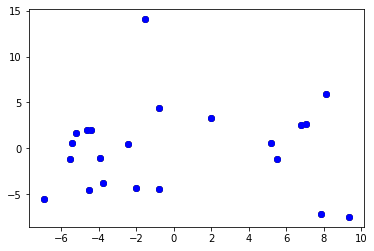

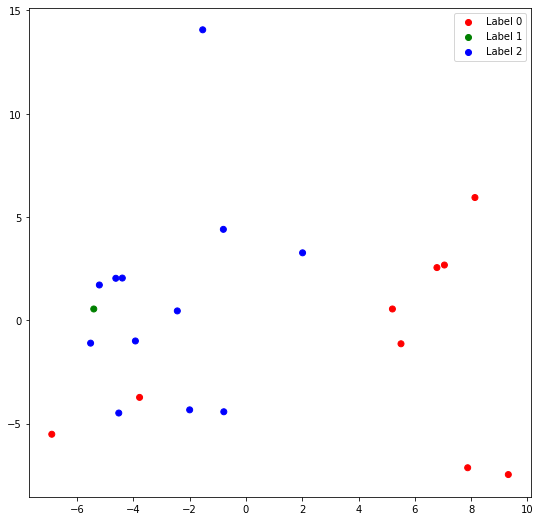

In [308]:
Xax=pca_test_premise_tw[:,0]
Yax=pca_test_premise_tw[:,1]
labels_full = results_premise["nb_pca_tw"]
colours = {} 
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
  
# Building the colour vector for each data point 
cvec = [colours[label+1] for label in labels_full] 
  
# Defining the scatter plot for each colour 
r = plt.scatter(Xax, Yax, color ='r');
g = plt.scatter(Xax, Yax, color ='g'); 
b = plt.scatter(Xax, Yax, color ='b'); 

  
# Plotting the clustered data 
plt.figure(figsize =(9, 9)) 
plt.scatter(Xax, Yax, c = cvec) 
plt.legend((r, g, b), ('Label 0', 'Label 1', 'Label 2')) 
plt.show() 

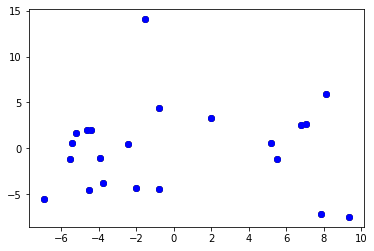

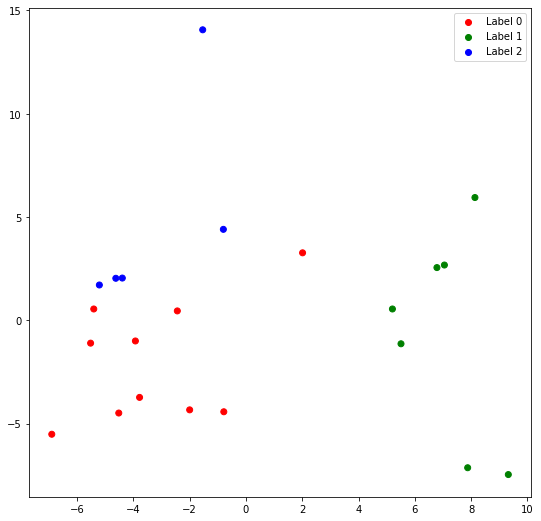

In [309]:
Xax=pca_test_premise_tw[:,0]
Yax=pca_test_premise_tw[:,1]
labels_full = results_premise["bc_pca_tw_sph"]
colours = {} 
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
  
# Building the colour vector for each data point 
cvec = [colours[label+1] for label in labels_full] 
  
# Defining the scatter plot for each colour 
r = plt.scatter(Xax, Yax, color ='r');
g = plt.scatter(Xax, Yax, color ='g'); 
b = plt.scatter(Xax, Yax, color ='b'); 

  
# Plotting the clustered data 
plt.figure(figsize =(9, 9)) 
plt.scatter(Xax, Yax, c = cvec) 
plt.legend((r, g, b), ('Label 0', 'Label 1', 'Label 2')) 
plt.show()

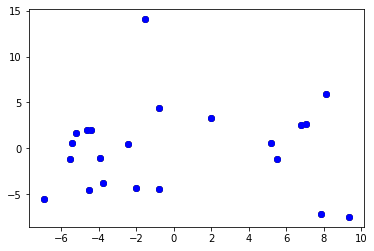

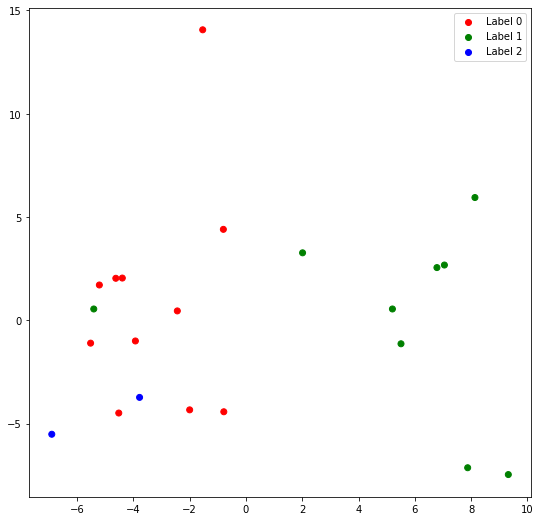

In [310]:
Xax=pca_test_premise_tw[:,0]
Yax=pca_test_premise_tw[:,1]
labels_full = results_premise["bc_pca_tw_full"]
colours = {} 
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
  
# Building the colour vector for each data point 
cvec = [colours[label+1] for label in labels_full] 
  
# Defining the scatter plot for each colour 
r = plt.scatter(Xax, Yax, color ='r');
g = plt.scatter(Xax, Yax, color ='g'); 
b = plt.scatter(Xax, Yax, color ='b'); 

  
# Plotting the clustered data 
plt.figure(figsize =(9, 9)) 
plt.scatter(Xax, Yax, c = cvec) 
plt.legend((r, g, b), ('Label 0', 'Label 1', 'Label 2')) 
plt.show() 